# Rocket assignment

##### Laurent Pétré & Ilan Renous


We are going to integrate the speed and the height of a rocket under given conditions. To do so, we are going to use Euler's method.

In [50]:
#we import the libraries we will need
import numpy as npy
import matplotlib.pyplot as plt
%matplotlib inline

## Rocket motion equations

The equations of motion for a rocket in purely vertical flight are given by

\begin{align}
\frac{dh}{dt} &= v\\
(m_s+m_p) \frac{dv}{dt}& = -(m_s+m_p)g + \dot{m}_pv_e - \frac{1}{2}\rho v|v|AC_D
\end{align}

$h$ is the altitude of the rocket

$m_s = 50kg$ is the weight of the rocket shell

$g = 9.81 \frac{m}{s^2}$

$\rho = 1.091 \frac{kg}{m^3}$ is the average air density (assumed constant throughout flight)

$A = \pi r^2$ is the maximum cross sectional area of the rocket, where $r = 0.5 m$

$v_e = 325 \frac{m}{s}$ is the exhaust speed

$C_D = 0.15 $ is the drag coefficient

$m_{po} = 100 kg$ at time $t = 0$ is the initial weight of the rocket propellant

The mass of the remaining propellant is given by:

$$m_p = m_{po} - \int^t_0 \dot{m}_p d\tau$$

where the time-varying burn rate  $\dot{m}_p$  is 20kg/s during the five first seconds, and then drop to zero.


## Defining  functions

We are going to define a vectorial function approximated at time $t_n$, of all the variables above, which is going to express the following vector: $$\begin{equation}
\vec{f}_{n}  = \begin{pmatrix} \dot{m}_{p} \\ \dot{h} \\ \dot{v} \end{pmatrix}
\end{equation}$$.

In [51]:
def f(t, u, ms = 50.0, g = -9.81, rho = 1.091, r = 0.5, ve = 325.,\
      CD = 0.15, mpdot = 20):
    u_ = npy.zeros(3)

    # Mass u_[0]
    if t < 5 :
        u_[0] = -mpdot
    else :
        u_[0] = 0
    
    # Height u_[1]
    u_[1] = u[2]

    # Speed u_[2]
    u_[2] = g - (0.5*rho*npy.pi*(r**2)*CD*u[2]*npy.abs(u[2]))/(ms+u[0])-(u_[0]*ve)/(ms+u[0])

    return u_

Now we are going to discretize time and define the following vector: $$\begin{equation}
\vec{u}_{n}  = \begin{pmatrix} m_{p} \\ h \\ v \end{pmatrix}\end{equation}$$ which will contain the information about the mass, height and speed of the rocket at a time $t_n$.  

In [52]:
t = npy.linspace(0, 40, 4000)
u = npy.zeros((3,4000))
u[0, 0] = 100.

## Euler's Method
Let $u$ be a function of time $t$. the derivative of $u$ is a fonction $f(u)$.

The approximate solution at time $t_n$ is $u_n$, and the numerical solution of the differential equation consists of computing a sequence of approximate solutions by the following formula:

$$u_{n+1} = u_n + \Delta t \,f(u_n).$$

This formula is called **Euler's method**.

In Python that gives:

In [53]:
def solve(t, u, f_func, stop_func, dt):
    i = 0
    while True :
        u[:,i+1] = u[:,i] + dt*f_func(t[i], u[:,i])

        if stop_func(t, u, i) :
            break

        i = i + 1


We used the fonction stop function which stops the iteration once the rocket has returned to the ground.

In [54]:
def stop(t, u, i):
    return (u[1, i] < 0)

## solve
We are now going to use all the fonctions defined above to solve this problem. We are in fact going to solve the following equation:$$\begin{equation}\ \vec{u}_{n+1}=\vec{u}_{n}+ \vec{f}_{n}\Delta t \ \end{equation}$$ which is a vectorial equivalent of the Euler's method given above.

In [55]:
solve(t, u, f, stop, 0.01)

## Solutions
Here is the graph of the mass, height and speed of the rocket as function of time: 

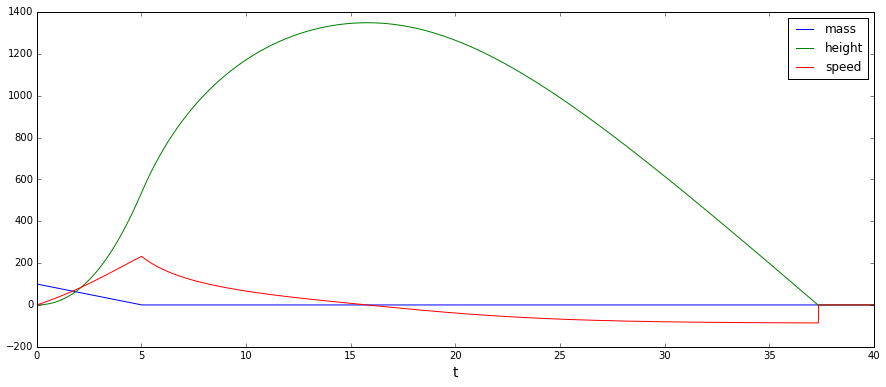

In [56]:
plt.figure(figsize=(15,6))
plt.plot(t, u[0,:])
plt.plot(t, u[1,:])
plt.plot(t, u[2,:])
plt.xlabel('t', fontsize=14) #x label
plt.legend(['mass','height','speed'])
plt.show()

In [57]:
print("time and speed when return to the ground :", t[-1], u[2,-1])
print("maximum height and time :"\
          , max(u[1,:])) #, t[h.index(max(h))])
print("maximum speed, time and height :"\
          , max(u[2,:])) #, t[v.index(max(v))], h[v.index(max(v))])


time and speed when return to the ground : 40.0 0.0
maximum height and time : 1348.80377816
maximum speed, time and height : 232.410080247


1. At time $t=3.2s$, the mass of rocket propellant remaining in the rocket is:

2. The maximum speed of the rocket is:  $\frac{m}{s}$
   this occur after $s$
   The altitude at this time is: 
    
3. The rocket's maximum altitude during flight is and occurs at time 

4. The rocket impact the ground at time and its velocity is (in $\frac{m}{s}$) at time of impact?

###### Source:
